In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
#read the pfac data, which shows the actuall police control area of the county
pfac = pd.read_csv('PFAC.csv')

#read the scenery data 
df = pd.read_csv('scenery.csv', encoding = "ISO-8859-1")
print('Size of the dataset: ' + str(df.shape[0]))

#switch the colomns and rows for pfac data
pfac = pfac.transpose()
pfac.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac.iloc[0]
pfac = pfac[1:]
pfac.columns = new_header
crime_df = pd.read_csv('number_crime.csv')

print(pfac.shape[1])

Size of the dataset: 29747
43


In [4]:
#find the county
def matchCounty(area):
    for i in pfac.columns:
        if area in list(pfac[i]):
            return i
    return np.nan

In [5]:
#the unique
len(df['County'].unique())

191

In [6]:
df['County'] = df['County'].apply(matchCounty)
len(df['County'].unique())

43

In [7]:
sum(df['County'].isnull())

8623

In [8]:
import statistics

df_rate = df.drop(columns=['ID', 'Place', 'Variance', 'Near', 'Category', 'Image', 'Date', 'URL'])
df_rate = df_rate.dropna()
df_rate['Avg_Rating'] = df_rate['Rating']
df_rate['Standard_Deviation'] = df_rate['Rating']
df_rate = df_rate.drop(columns=['Rating'])
df_rate['num_pictures'] = 1


aggregation_functions = {'Avg_Rating': 'mean', 'Standard_Deviation': 'std', 'num_pictures': 'sum'}
df_rate_mean = df_rate.groupby(df_rate['County']).aggregate(aggregation_functions)
df_rate_mean

,Avg_Rating,Standard_Deviation,num_pictures
County,,,
Avon and Somerset,2.696472,1.857305,1241
Bedfordshire,2.540482,1.912688,199
Cambridgeshire,2.633403,1.707682,254
Cheshire,2.339017,1.738711,542
Cleveland,2.062437,1.618213,59
Cumbria,2.764218,1.890491,1578
Derbyshire,2.786890,2.012564,321
Devon and Cornwall,2.812783,1.805445,1463
Dorset,2.753893,1.859180,165


AxesSubplot(0.125,0.125;0.775x0.755)


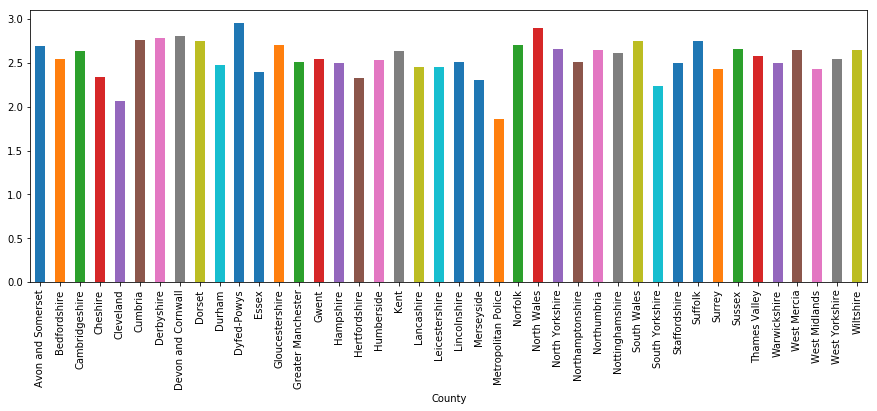

In [39]:
plot1 = df_rate_mean['Avg_Rating'].plot(figsize=(15, 5),kind='bar')
print(plot1)

In [10]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
print(df.dropna())
df = df.dropna()

          ID                                          Place  Rating  Variance  \
0          1                          Minchinhampton Common  1.8765    4.1111   
1          2                   The Footpath near Cuckoo Row  0.5000    4.0000   
2          3                       The Park, Minchinhampton  2.1728    4.2222   
3          4                   The muddy fields of Antrobus  7.7600    3.8000   
4          5                                 Budworth Heath  3.4722    4.1667   
10        11                                     Kinmel Bay  4.2500    5.5000   
11        12                                    Lilla Cross  1.1389    4.8333   
12        13                       Sheep in Antrobus fields  2.1389    3.1667   
13        14                            Fields near Rhuallt  0.4000    5.0000   
14        15            Pool off Pools Platt Lane, Antrobus  3.3469    4.2857   
15        16                       Fields near Hollies Farm  1.6735    3.5714   
16        17           Alder

In [12]:

st_co, p_co = stats.normaltest(df_rate['Avg_Rating'].values)
print(st_co)
print(p_co)
#st_cs, p_cs = stats.normaltest(h_cs)

4215.91273585
0.0


In [13]:
df_crime = pd.read_csv('number_crime.csv')

df_crime
t = df_rate_mean['Avg_Rating']
df_crime['avg_scenery'] = t

l = df_rate_mean.index.tolist()
for i in range(0,42):
   
    if df_crime.loc[i]['AreaName'] in l:     
        df_crime.set_value(i,'avg_scenery', df_rate_mean.loc[df_crime.loc[i]['AreaName']]['Avg_Rating'])
  



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [28]:
df_crime = df_crime.dropna()
for i in range(0,42):
    if (i == 27):
        continue
    for j in df_crime.columns:
        if ',' in str(df_crime.loc[i][j]):
            df_crime.set_value(i, j, df_crime.loc[i][j].replace(',' , ''))

for i in df_crime.columns:
    if i != 'AreaName':
        df_crime[i] = df_crime[i].astype(float)
print(df_crime)

               AreaName  TotalRecordedCrime  ViolenceAgainstPerson  Homicide  \
0             Cleveland             65397.0                20109.0      15.0   
1                Durham             62393.0                23908.0       5.0   
2           Northumbria            160292.0                47904.0      11.0   
3              Cheshire             94201.0                32600.0      19.0   
4               Cumbria             35372.0                13244.0       4.0   
5    Greater Manchester            334976.0                97236.0      78.0   
6            Lancashire            162819.0                62273.0      21.0   
7            Merseyside            134164.0                43752.0      21.0   
8            Humberside             98311.0                32747.0      17.0   
9       North Yorkshire             43762.0                13729.0       5.0   
10      South Yorkshire            142739.0                43718.0      19.0   
11       West Yorkshire            29157

In [36]:
df_crime.corr()

,TotalRecordedCrime,ViolenceAgainstPerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,SeriousUnlawfulDriving,SexualOffences,Robbery,TheftOffences,...,TheftFromPerson,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery
TotalRecordedCrime,1.000000,0.983784,0.958349,0.986562,0.970696,0.931334,0.573757,0.985557,0.950736,0.986355,...,0.929994,0.915180,0.971912,0.983312,0.958377,0.929010,0.977278,0.874405,0.899882,-0.565220
ViolenceAgainstPerson,0.983784,1.000000,0.927507,0.980815,0.991014,0.970058,0.641545,0.989680,0.888426,0.944190,...,0.863319,0.851578,0.961408,0.941865,0.978469,0.874534,0.954084,0.904004,0.940944,-0.529650
Homicide,0.958349,0.927507,1.000000,0.943589,0.917281,0.855753,0.482274,0.938896,0.938044,0.951399,...,0.902296,0.869884,0.915530,0.941096,0.910309,0.880132,0.955512,0.852021,0.859330,-0.549602
ViolenceWithInjury,0.986562,0.980815,0.943589,1.000000,0.958256,0.921537,0.576103,0.984141,0.930983,0.970132,...,0.900057,0.888439,0.970073,0.963554,0.952861,0.911568,0.961395,0.842965,0.881297,-0.535724
ViolenceWithoutInjury,0.970696,0.991014,0.917281,0.958256,1.000000,0.950762,0.655270,0.984777,0.864763,0.924331,...,0.842829,0.845071,0.942042,0.924377,0.971781,0.851313,0.945285,0.920406,0.949382,-0.493285
StalkingAndHarassment,0.931334,0.970058,0.855753,0.921537,0.950762,1.000000,0.662964,0.934783,0.805141,0.873674,...,0.784716,0.750513,0.912753,0.873514,0.955114,0.799246,0.890264,0.896870,0.942322,-0.543544
SeriousUnlawfulDriving,0.573757,0.641545,0.482274,0.576103,0.655270,0.662964,1.000000,0.621335,0.419997,0.503584,...,0.382101,0.405704,0.609110,0.496208,0.651408,0.432582,0.582265,0.581669,0.699866,-0.271118
SexualOffences,0.985557,0.989680,0.938896,0.984141,0.984777,0.934783,0.621335,1.000000,0.906230,0.955121,...,0.881334,0.879492,0.965880,0.955727,0.969383,0.884483,0.963041,0.889075,0.920821,-0.482729
Robbery,0.950736,0.888426,0.938044,0.930983,0.864763,0.805141,0.419997,0.906230,1.000000,0.983718,...,0.983483,0.939425,0.898005,0.979602,0.832372,0.958875,0.932657,0.729709,0.744715,-0.561729
TheftOffences,0.986355,0.944190,0.951399,0.970132,0.924331,0.873674,0.503584,0.955121,0.983718,1.000000,...,0.967772,0.950931,0.955614,0.995735,0.905880,0.957755,0.966544,0.796423,0.826788,-0.583637


In [29]:
#df_crime = df_crime.dropna()
outcome_1, predictors_1 = patsy.dmatrices("SeriousUnlawfulDriving ~ avg_scenery", data = df_crime )
#print(predictors_1)

mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1)

In [19]:
print(res_1.summary())

                              OLS Regression Results                              
Dep. Variable:     SeriousUnlawfulDriving   R-squared:                       0.074
Model:                                OLS   Adj. R-squared:                  0.050
Method:                     Least Squares   F-statistic:                     3.094
Date:                    Sun, 02 Jun 2019   Prob (F-statistic):             0.0864
Time:                            16:34:25   Log-Likelihood:                -170.03
No. Observations:                      41   AIC:                             344.1
Df Residuals:                          39   BIC:                             347.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

In [20]:
outcome_2, predictors_2 = patsy.dmatrices("Homicide ~ avg_scenery", data = df_crime )
#print(predictors_1)

mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     16.88
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           0.000198
Time:                        16:34:27   Log-Likelihood:                -180.83
No. Observations:                  41   AIC:                             365.7
Df Residuals:                      39   BIC:                             369.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     180.3225     39.763      4.535      

In [32]:
outcome_3, predictors_3 = patsy.dmatrices("DrugOffences ~ avg_scenery", data = df_crime )

mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:           DrugOffences   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     18.13
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           0.000126
Time:                        16:42:02   Log-Likelihood:                -401.98
No. Observations:                  41   AIC:                             808.0
Df Residuals:                      39   BIC:                             811.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     4.05e+04   8750.376      4.629      

In [34]:
outcome_4, predictors_4 = patsy.dmatrices("PossessionOfWeaponsOffences ~ avg_scenery", data = df_crime )

mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                                 OLS Regression Results                                
Dep. Variable:     PossessionOfWeaponsOffences   R-squared:                       0.297
Model:                                     OLS   Adj. R-squared:                  0.279
Method:                          Least Squares   F-statistic:                     16.51
Date:                         Sun, 02 Jun 2019   Prob (F-statistic):           0.000227
Time:                                 16:43:25   Log-Likelihood:                -342.43
No. Observations:                           41   AIC:                             688.9
Df Residuals:                               39   BIC:                             692.3
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [37]:
outcome_5, predictors_5 = patsy.dmatrices("TotalRecordedCrime ~ avg_scenery", data = df_crime )

mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:     TotalRecordedCrime   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     18.31
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           0.000118
Time:                        16:46:55   Log-Likelihood:                -533.73
No. Observations:                  41   AIC:                             1071.
Df Residuals:                      39   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.049e+06   2.18e+05      4.823      

In [40]:
outcome_6, predictors_6 = patsy.dmatrices("ViolenceAgainstPerson ~ avg_scenery", data = df_crime )

mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

                              OLS Regression Results                             
Dep. Variable:     ViolenceAgainstPerson   R-squared:                       0.281
Model:                               OLS   Adj. R-squared:                  0.262
Method:                    Least Squares   F-statistic:                     15.21
Date:                   Sun, 02 Jun 2019   Prob (F-statistic):           0.000369
Time:                           16:48:58   Log-Likelihood:                -480.62
No. Observations:                     41   AIC:                             965.2
Df Residuals:                         39   BIC:                             968.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.696e+